# Сборный проект

<b>Описание проекта</b>

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Изучение исходной информации

In [1]:
#подключим необходимые для работы библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
import warnings
warnings.simplefilter("ignore")
from scipy import stats as st
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
#прочитаем исходные датафреймы

try:
    games = pd.read_csv('C:/Users//datasets/games.csv', sep=',') 
    
except:
    games = pd.read_csv('/datasets/games.csv', sep=',')

In [3]:
# изучим основную информацию о датафрейме
print('Первые 10 строк датафрейма:')
display(games.head(10))
print('Основная информация о датафрейме:')
display(games.info())
print('Доля пропущенных данных в датафрейме:')
display(games.isna().mean())
print('Количество дубликатов: ')
display(games.duplicated().sum())
print('Размер датасета:')
display(games.shape)

Первые 10 строк датафрейма:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Основная информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Доля пропущенных данных в датафрейме:


Name              0.00
Platform          0.00
Year_of_Release   0.02
Genre             0.00
NA_sales          0.00
EU_sales          0.00
JP_sales          0.00
Other_sales       0.00
Critic_Score      0.51
User_Score        0.40
Rating            0.40
dtype: float64

Количество дубликатов: 


0

Размер датасета:


(16715, 11)

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Изучив исходные данные датафрейма, можно сказать следующее: по большей части столбцов данные представлены в полном виде, замечено, что отсутствует практически в половине строк информация по рейтингам от критиков и юзеров, а также рейтинг ESRB. 
Также в датафрейме имеются столбцы с неверным типом данных. 
</div>

## Предобработка данных




### Замена названий столбцов

In [4]:
#приведем названия столбцов к нижнему регистру

games.columns = games.columns.str.lower()

### Обработка пропущенных значений

In [5]:
#определим количество пропущенных значений в каждом столбце датафрейма

display(games.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
#посмотрим что это за строки, в которых нет названия игры и жанра

display(games[games['genre'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Как можно заметить, наибольшее количество пропусков наблюдается в столбцах с оценками и рейтингом игр. Заменить пропуски в столбцах 'year_of_release', 'critic_score', 'user_score', 'rating' каким-либо значением не получится, потому что они появились там не случайным образом, а именно пользователи или критики не поставили оценку. Удалим строки, в которых пропущено значение года выпуска, а также название игры и жанр, т.к. без этих данных сложно будет проводить дальнейший анализ.
</div>

In [7]:
#удалим строки, в которых пропущено значение года выпуска

games = games.dropna(subset=['name', 'year_of_release', 'genre']).reset_index(drop=True)

In [8]:
#разберемся со значением 'tbd' в столбце с оценкой пользователей

display(games['user_score'].value_counts().sort_values(ascending=False))

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
9.6       2
0.3       2
1.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Значение 'tbd' в столбце с оценкой пользователей означает "подлежит уточнению", то есть возможно, на момент выгрузки базы данных, пользователь не поставил оценку игре, либо не было возможности поставтиь оценку и данный функционал появился позднее. Значение 'tbd' присутствует в 24% строк в качестве оценки пользователей. Заменим данное значение на "nan" для дальнейшей обработки значений данного столбца.
</div>

In [9]:
#замена значений 'tbd' на nan

games['user_score'] = games['user_score'].replace('tbd', np.nan)

### Замена типа данных

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Произведем замену типа данных для столбцов 'year_of_release' и 'user_score', год выпуска представлен одним числом, и его будет достаточно привести к целочисленному типу данных. А оценка пользователей предсталена в виде числа с плавающей точкой, так что присвоим данному столбцу вещественный тип данных. 
</div>

In [10]:
#произведем замену типа данных для столбцов 'year_of_release' и 'user_score'

games['year_of_release'] = games['year_of_release'].astype(int)
games['user_score'] = games['user_score'].astype(float)

### Подсчет суммарных продаж во всех регионах

In [11]:
games['sum_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

### Вывод

В процессе предобработки данных нами была произведена замена названий столбцов, обработка пропущенных значений по ряду столбцов: 'name', 'year_of_release', 'genre', также замена значений 'tbd' на nan по стоблцу 'user_score'. Также была произведена замена типа данных на корректный тип.

## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [12]:
#чтобы ответить на данный вопрос построим сводную таблицу 

games_year = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_year

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


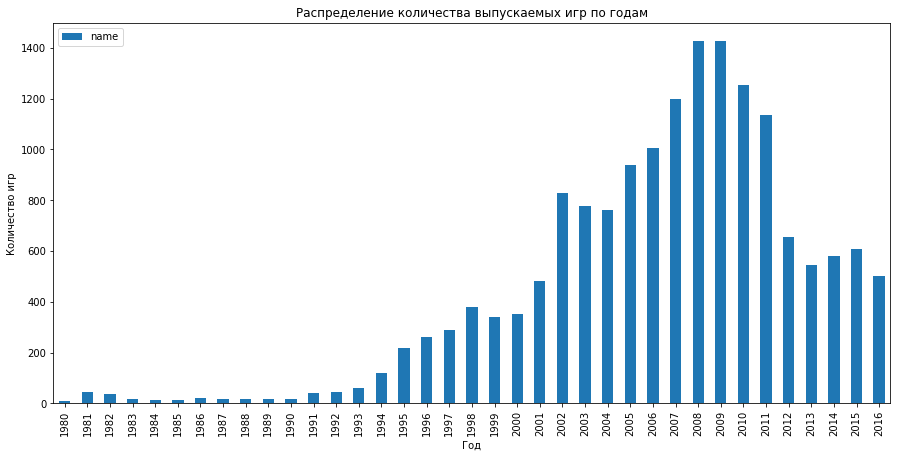

In [13]:
#также построим гистограмму для более наглядного распределения

games_year.plot(kind='bar', figsize=(15,7))

plt.legend(loc='upper left')
plt.title('Распределение количества выпускаемых игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

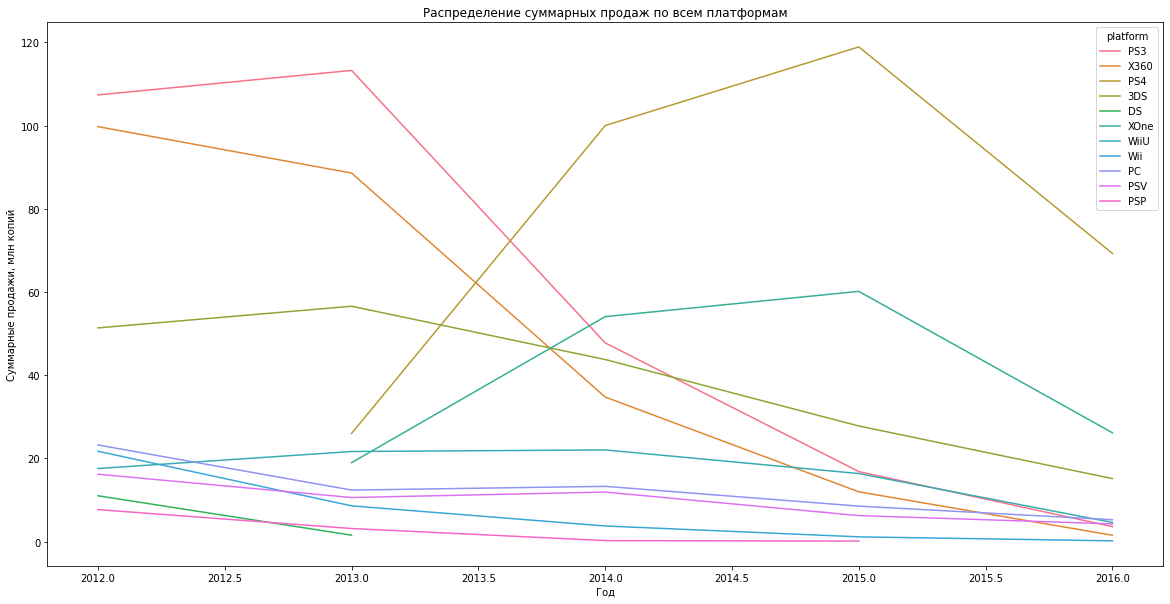

In [14]:
#построим графики распределения суммарных продаж по годам по всем платформам после 2012 года

plt.figure(figsize=(20,10))
plt.title('Распределение суммарных продаж по всем платформам')

sns.lineplot(data=games.query('year_of_release >=2012'), x="year_of_release", y="sum_sales", hue="platform", estimator='sum', ci=None)

plt.xlabel('Год')
plt.ylabel('Суммарные продажи, млн копий')
plt.show()

In [16]:
#определим аналитически какие платформы популярны в последние годы по количеству продаж копий игр

platform_sales_all = games.pivot_table(index=['year_of_release','platform'], values='sum_sales', aggfunc='sum')

platform_sales_all = platform_sales_all.sort_values(by=['year_of_release', 'sum_sales'], ascending=False).head(9)

platform_sales_all

sum_sales
year_of_release platform           
2016            PS4           69.25
                XOne          26.15
                3DS           15.14
                PC             5.25
                WiiU           4.60
                PSV            4.25
                PS3            3.60
                X360           1.52
                Wii            0.18

In [17]:
#определим по каким платформам имеются данные по выпускаемым играм

games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Как можно заметить по гистограмме, активное развитие игровой индустрии начинается с 1995 года, достигая пика выпускаемых игр в 2008-2009 годах (1427 и 1426 игр в год соответственно). 
<br>
Также после 2011 года наблюдается резкий спад выпускаемых игр. Данное явление может быть связано с тем, что появляются новые платформы, в том числе мобильные операционные системы, разработчики пишут больше игр для iOS и Android. Как мы видим, данных платформ нет в нашем датасете.
<br>  
Стоит отметить, что продажи по большинству платформ практически сошли на нет к 2016 году. Вторая волна активных продаж началась в 2013 году, когда были созданы такие платформы как PS4 и XOne. Возьмем период с 2013 года как актуальный для дальнейшего анализа.
<br>  
</div>

### Как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?


In [18]:
#построим сводную таблицу по распределению продаж в зависимости от платформы за весь период

platform_sales = games.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False)

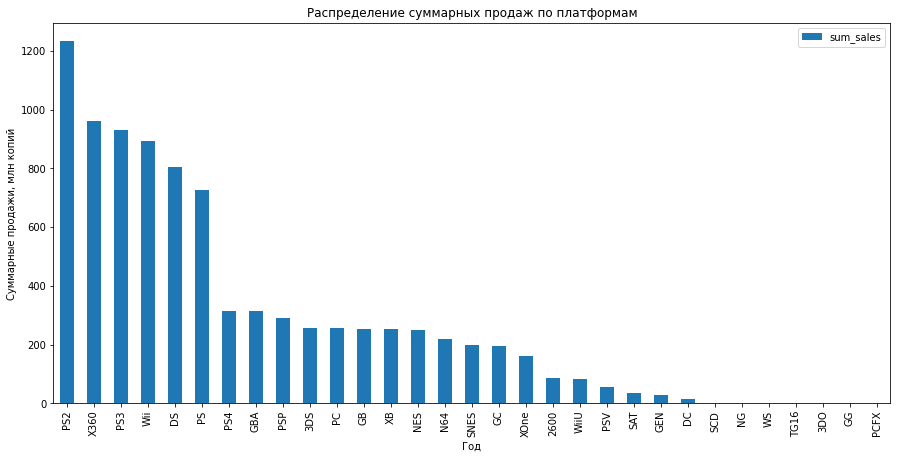

In [19]:
#также построим гистограмму для более наглядного распределения

platform_sales.plot(kind='bar', figsize=(15,7))

plt.legend(loc='upper right')
plt.title('Распределение суммарных продаж по платформам')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи, млн копий')
plt.show()

In [20]:
#определим средний период жизни платформ

mean_time_life = games.pivot_table(index='platform', values='year_of_release', aggfunc={'min','max'})

#считаем период жизни платформы
mean_time_life['delta_time'] = mean_time_life['max']-mean_time_life['min']

In [21]:
#считаем среднее время жизни платформы
mean_time_life['delta_time'].mean()

7.612903225806452

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
По гистрограмме можно выделить шесть наиболее популярных платформ: PS2, X360, PS3, Wii, DS, PS.
<br>    
Среднее время жизни платформы равно 7.6 лет.    
<br> 
</div>

In [22]:
#определим средний период жизни платформ без учета ПК

mean_time_life_1 = games.query('platform !="PC"').pivot_table(index='platform', values='year_of_release', aggfunc={'min','max'})

#считаем период жизни платформы
mean_time_life_1['delta_time'] = mean_time_life_1['max']-mean_time_life_1['min']

#считаем среднее время жизни платформы
mean_time_life_1['delta_time'].mean()

6.833333333333333

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Можно сказать, что ПК играют значительную роль в подсчете времени жизни платформы, потому что если их исключить, то средний период жизни платформы сокращается до 6.8 лет 
<br> 
</div

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [23]:
#для начала составим датафрейм по продажам игр за актуальный период

games_actual_period = games.query('year_of_release >= 2013')

games_actual_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.10,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16432,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16436,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [24]:
#определим список потенциально прибыльных платформ
pot_platform = platform_sales_all.head(4).index.get_level_values(1)

pot_platform

Index(['PS4', 'XOne', '3DS', 'PC'], dtype='object', name='platform')

In [25]:
#теперь построим распределение по популярным платформам по годам

platform_sales_top = games_actual_period.query('platform in @pot_platform')
                        
platform_sales_top

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
...,...,...,...,...,...,...,...,...,...,...,...,...
16389,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.00,6.70,NaN,0.01
16397,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16401,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01
16406,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


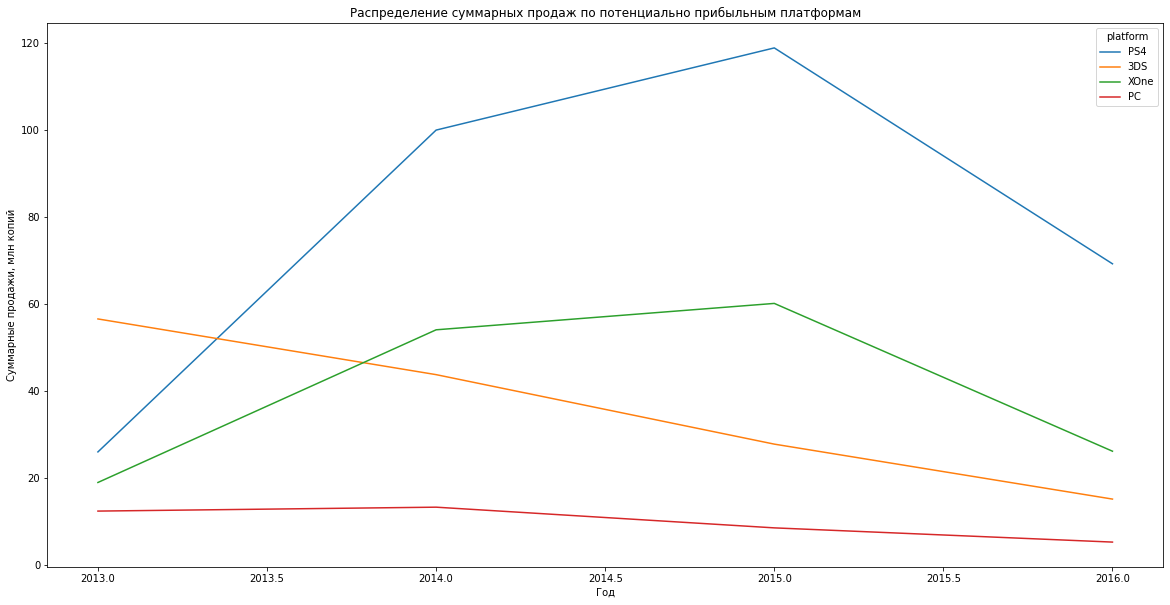

In [26]:
#построим графики распределения суммарных продаж по годам 

plt.figure(figsize=(20,10))
plt.title('Распределение суммарных продаж по потенциально прибыльным платформам')

sns.lineplot(data=platform_sales_top, x="year_of_release", y="sum_sales", hue="platform", estimator='sum', ci=None)

plt.xlabel('Год')
plt.ylabel('Суммарные продажи, млн копий')
plt.show()

In [27]:
#определим аналитически какие платформы популярны в последние годы по количеству продаж копий игр

platform_sales_top_act = platform_sales_top.pivot_table(index=['year_of_release','platform'], values='sum_sales', aggfunc='sum')

platform_sales_top_act.sort_values(by=['year_of_release', 'sum_sales'], ascending=False).head(17)

sum_sales
year_of_release platform           
2016            PS4           69.25
                XOne          26.15
                3DS           15.14
                PC             5.25
2015            PS4          118.90
                XOne          60.14
                3DS           27.78
                PC             8.52
2014            PS4          100.00
                XOne          54.07
                3DS           43.76
                PC            13.28
2013            3DS           56.57
                PS4           25.99
                XOne          18.96
                PC            12.38

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Среди всех платформ можно выделить ряд платформ, по которым еще есть значительные продажи игр и на которые можно сделать ставку в дальнейшем: PS4, XOne, 3DS, PC. Ни одна из перспективных платформ не показывает роста, однако продажи игр все еще исчисляются милионными тиражами.
<br>     
Вплоть до 2014 года на рынке наблюдалось лидерство приставок PS3 и X360, однако с изобретением PS4 и XOne в 2013 году, картина значительно изменилась, данные платформы заняли большой процент рынка и стали лидерам по продаваемым играм вплоть до 2016 года. 
</div>

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

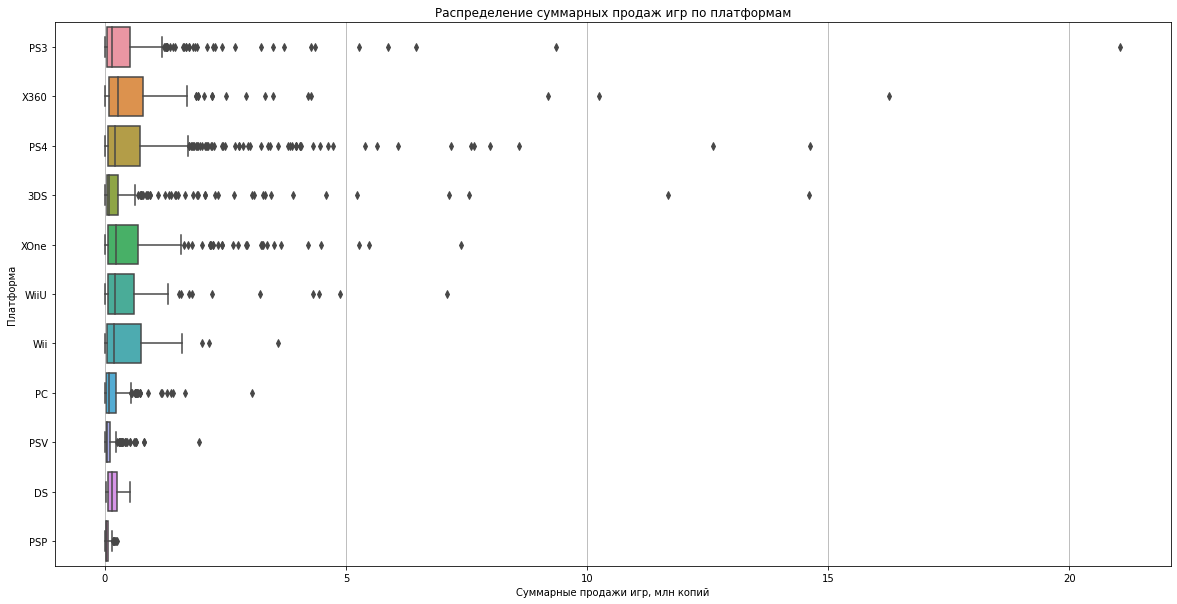

In [28]:
#построим график "ящик с усами" по глобальным продажам игр в разбивке по платформам c 2013 года

plt.figure(figsize=(20,10))
plt.grid(True)

plt.title('Распределение суммарных продаж игр по платформам')

sns.boxplot(data=games_actual_period, x='sum_sales', y='platform')

plt.xlabel('Суммарные продажи игр, млн копий')
plt.ylabel('Платформа')
plt.show()

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Как можно заметить по графику выше, есть ряд платформ с играми-бестселлерами, например, такие платформы как PS3, PS4, X360, 3DS. По данным платформам есть игры, которые разошлись тиражом более 10 млн, при том, что, допустим, платформа PS4 относительно молодая.
</div>

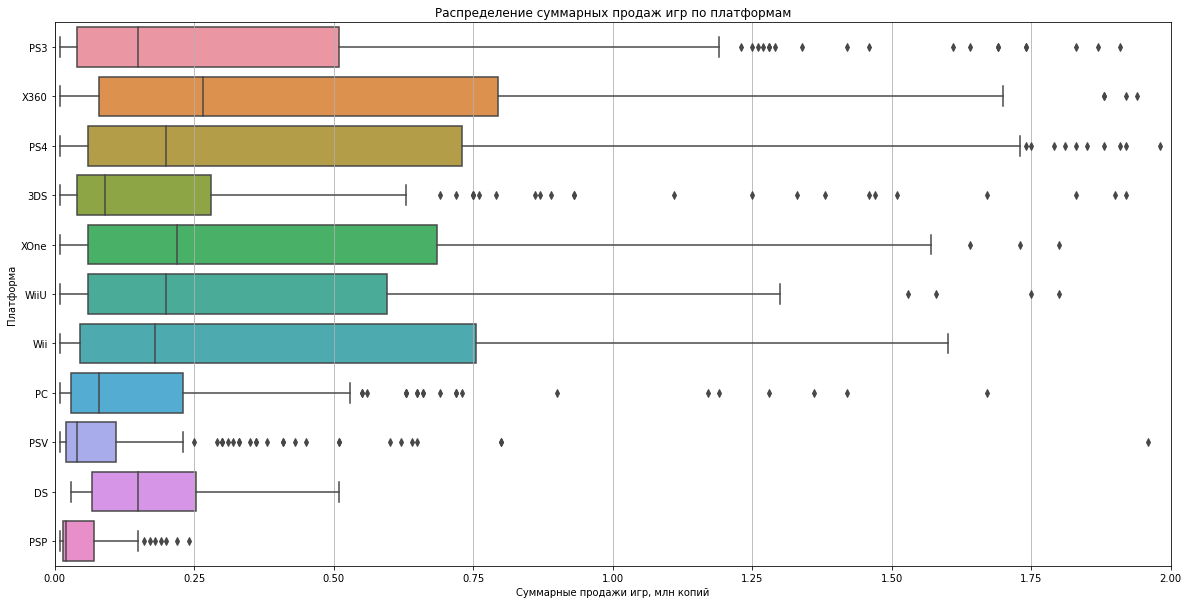

In [29]:
#построим график "ящик с усами" по глобальным продажам игр в разбивке по платформам c 2013 года

plt.figure(figsize=(20,10))
plt.grid(True)

plt.title('Распределение суммарных продаж игр по платформам')

k = sns.boxplot(data=games_actual_period, x='sum_sales', y='platform')
k.set(xlim=(0, 2))

plt.xlabel('Суммарные продажи игр, млн копий')
plt.ylabel('Платформа')
plt.show()

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
По приведенному выше графику можно выделить несколько лидеров по медианным продажам: X360 - единственная платформа с медианными продажами выше 250 тыс.копий, на втором месте XOne, далее - PS4 и WiiU.
</div>

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
В качестве популярной платформы возьмем платформу PS4, которая показывает достаточно высокие продажи на протяжении последних лет, вплоть до 2016 года.
</div>

In [30]:
#создадим датафрейм для нашей платформы

pop_platform = games_actual_period.query('platform == "PS4"')

#проверим полноту данных для дальнейшего анализа
pop_platform.isna().mean()

name              0.00
platform          0.00
year_of_release   0.00
genre             0.00
na_sales          0.00
eu_sales          0.00
jp_sales          0.00
other_sales       0.00
critic_score      0.36
user_score        0.34
rating            0.35
sum_sales         0.00
dtype: float64

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Видно, что у трети игр нет оценок пользователей и критиков.
</div>

<Figure size 1440x720 with 0 Axes>

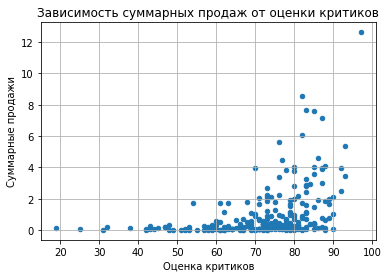

In [31]:
#для начала оценим зависимость суммарных продаж от оценки критиков

plt.figure(figsize=(20,10))

pop_platform.plot(x='critic_score', y='sum_sales', kind='scatter', grid=True)
plt.title('Зависимость суммарных продаж от оценки критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи')
plt.show()

In [32]:
#посчитаем коэффициент корреляции Пирсона для определения зависимости суммарных продаж от оценки критиков

print(pop_platform['critic_score'].corr(pop_platform['sum_sales']))

0.40656790206178095


<Figure size 1440x720 with 0 Axes>

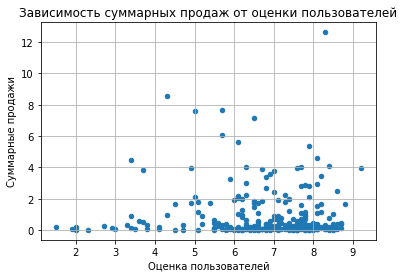

In [33]:
#далее оценим зависимость суммарных продаж от оценки пользователей

plt.figure(figsize=(20,10))

pop_platform.plot(x='user_score', y='sum_sales', kind='scatter', grid=True)
plt.title('Зависимость суммарных продаж от оценки пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные продажи')
plt.show()

In [34]:
#посчитаем коэффициент корреляции Пирсона для определения зависимости суммарных продаж от оценки пользователей

print(pop_platform['user_score'].corr(pop_platform['sum_sales']))

-0.031957110204556376


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Между суммарными продажами игр на PS4 и оценками критиков есть слабая положительная зависимость, а вот между оценками пользователей и суммарными продажами зависимости нет.
</div>

### Соотнесите выводы с продажами игр на других платформах.

In [35]:
#теперь построим распределение по популярным платформам по годам

platform_sales_list = games_actual_period.query('platform in @pot_platform')[['name','platform','sum_sales','user_score', 'critic_score']]

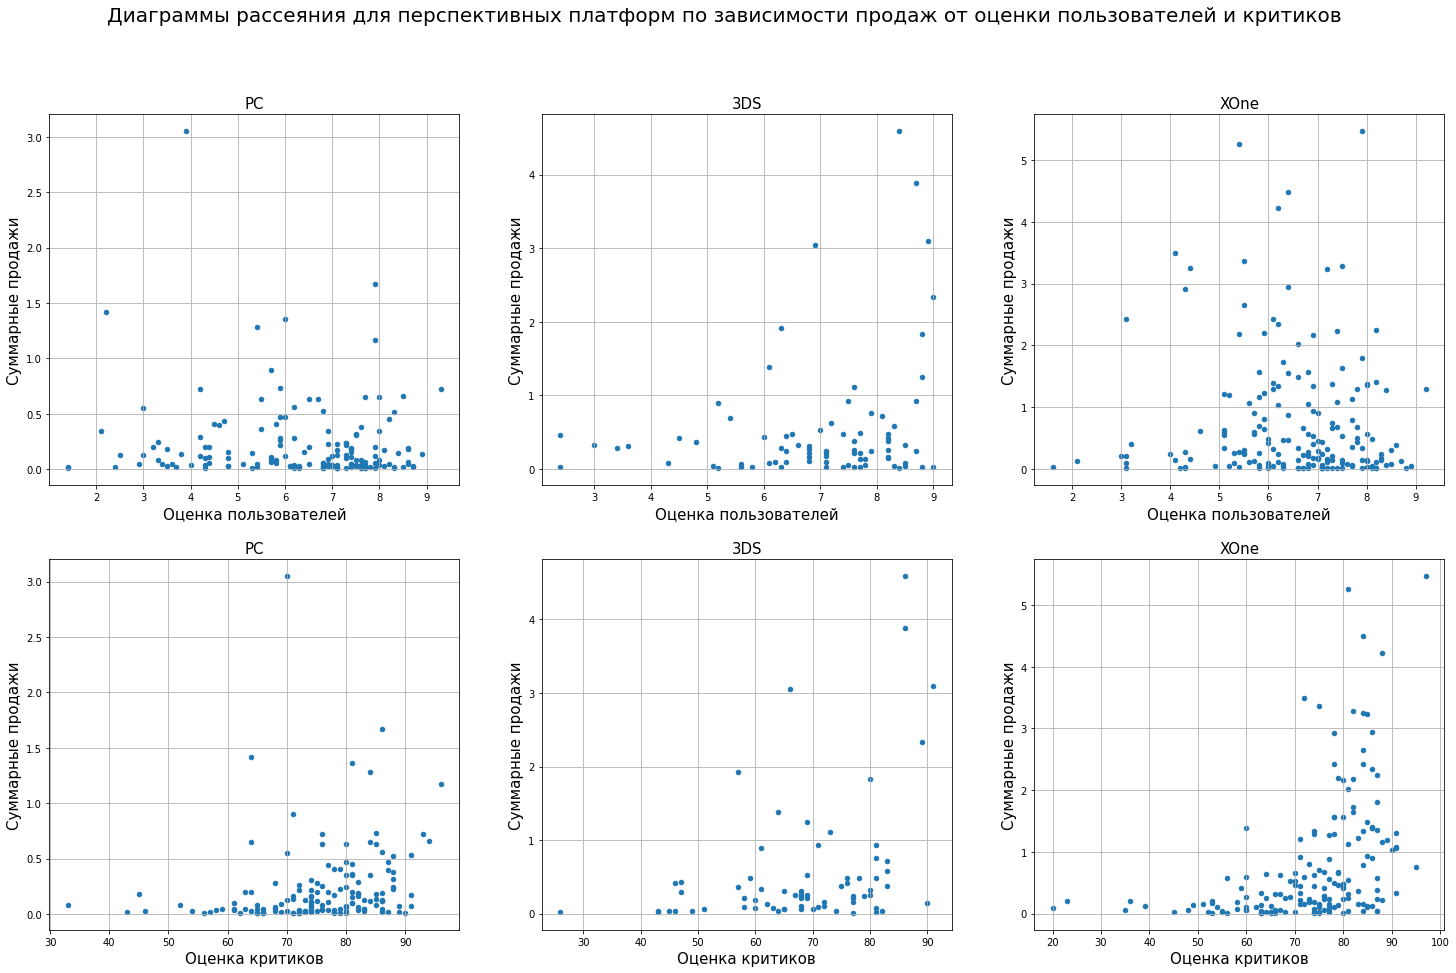

In [36]:
#далее построим диаграммы рассеяния для перспективных платформ по зависимости продаж от оценки пользователей

fig, axs = plt.subplots(2,3, figsize=(25,15))
fig.suptitle('Диаграммы рассеяния для перспективных платформ по зависимости продаж от оценки пользователей и критиков', fontsize=20)

games_actual_period.query('platform == "PC"').plot(ax=axs[0,0],  x='user_score', y='sum_sales', kind='scatter', grid=True)

axs[0,0].set_title('PC', fontsize=15)
axs[0,0].set_xlabel('Оценка пользователей', fontsize=15)
axs[0,0].set_ylabel('Суммарные продажи', fontsize=15)

games_actual_period.query('platform == "3DS"').plot(ax=axs[0,1],  x='user_score', y='sum_sales', kind='scatter', grid=True)
axs[0,1].set_title('3DS', fontsize=15)
axs[0,1].set_xlabel('Оценка пользователей', fontsize=15)
axs[0,1].set_ylabel('Суммарные продажи', fontsize=15)

games_actual_period.query('platform == "XOne"').plot(ax=axs[0,2],  x='user_score', y='sum_sales', kind='scatter', grid=True)
axs[0,2].set_title('XOne', fontsize=15)
axs[0,2].set_xlabel('Оценка пользователей', fontsize=15)
axs[0,2].set_ylabel('Суммарные продажи', fontsize=15)

games_actual_period.query('platform == "PC"').plot(ax=axs[1,0],  x='critic_score', y='sum_sales', kind='scatter', grid=True)
axs[1,0].set_title('PC', fontsize=15)
axs[1,0].set_xlabel('Оценка критиков', fontsize=15)
axs[1,0].set_ylabel('Суммарные продажи', fontsize=15)

games_actual_period.query('platform == "3DS"').plot(ax=axs[1,1],  x='critic_score', y='sum_sales', kind='scatter', grid=True)
axs[1,1].set_title('3DS', fontsize=15)
axs[1,1].set_xlabel('Оценка критиков', fontsize=15)
axs[1,1].set_ylabel('Суммарные продажи', fontsize=15)

games_actual_period.query('platform == "XOne"').plot(ax=axs[1,2],  x='critic_score', y='sum_sales', kind='scatter', grid=True)
axs[1,2].set_title('XOne', fontsize=15)
axs[1,2].set_xlabel('Оценка критиков', fontsize=15)
axs[1,2].set_ylabel('Суммарные продажи', fontsize=15)

plt.show()

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Спасибо за ссылки на ресурсы. Я задавался этимв вопросом, что, допустим, подписи осей одинаковые, и можно это как-то автоматизировать. Изучу данные материалы для работы в дальнейших проектах.
</div>

In [37]:
#посчитаем коэффициент корреляции Пирсона для определения зависимости суммарных продаж от оценки критиков

for platform in pot_platform:
    platform_list = games_actual_period.query('platform == @platform')
    
    print(f'Корреляция между суммарными продажами и оценкой критиков для платформы {platform} равна:',
          round(platform_list['critic_score'].corr(platform_list['sum_sales']),3))
    print(f'Корреляция между суммарными продажами и оценкой пользователей для платформы {platform} равна:',
           round(platform_list['user_score'].corr(platform_list['sum_sales']),3))

Корреляция между суммарными продажами и оценкой критиков для платформы PS4 равна: 0.407
Корреляция между суммарными продажами и оценкой пользователей для платформы PS4 равна: -0.032
Корреляция между суммарными продажами и оценкой критиков для платформы XOne равна: 0.417
Корреляция между суммарными продажами и оценкой пользователей для платформы XOne равна: -0.069
Корреляция между суммарными продажами и оценкой критиков для платформы 3DS равна: 0.357
Корреляция между суммарными продажами и оценкой пользователей для платформы 3DS равна: 0.242
Корреляция между суммарными продажами и оценкой критиков для платформы PC равна: 0.196
Корреляция между суммарными продажами и оценкой пользователей для платформы PC равна: -0.094


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
По проведенному выше анализу можно сказать, что наибольшая зависимость между оценкой критиков и суммарными продажами наблюдается по платформам XOne и PS4 (0.417 и 0.407 соответсвенно). Также лишь по одной платформе 3DS можно выделить слабовыраженную положительную зависимость между оценками пользователей и суммарными продажами.
</div>

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [38]:
#составим сводную таблицу по жанрам для дальнейшей работы

genre = games_actual_period.pivot_table(index='genre', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False)

genre

,sum_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


In [39]:
#определяем наиболее популярные игры в популярных жанрах

genre_games = games_actual_period.query('genre == "Action" | genre == "Shooter"').sort_values(by='sum_sales', ascending=False).head(15)

genre_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.10,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.00,2.60,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.00,2.60,M,9.36
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.00,5.70,M,7.66
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
149,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95.00,9.10,M,5.86


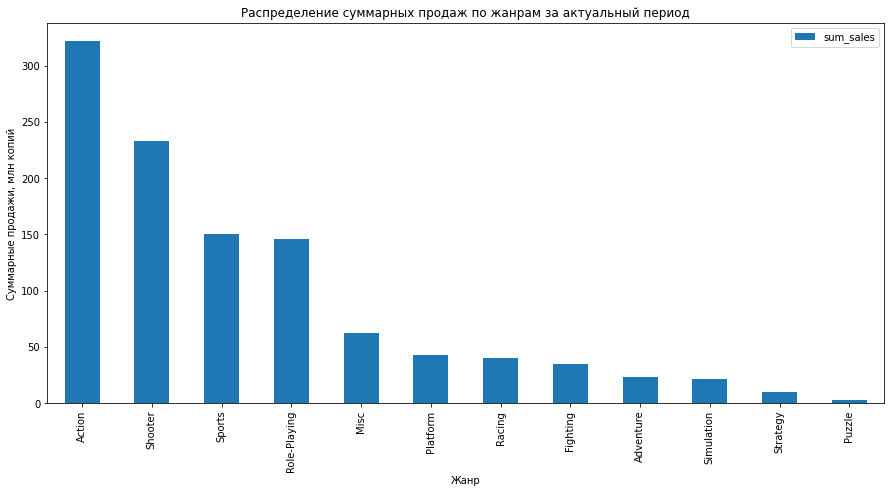

In [40]:
#также построим гистограмму для более наглядного распределения

genre.plot(kind='bar', figsize=(15,7))

plt.legend(loc='upper right')
plt.title('Распределение суммарных продаж по жанрам за актуальный период')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи, млн копий')
plt.show()

In [41]:
#составим сводную таблицу по жанрам для дальнейшей работы

genre_mean = games_actual_period.pivot_table(index='genre', values='sum_sales', aggfunc='median').sort_values(by='sum_sales', ascending=False)

genre_mean

,sum_sales
genre,
Shooter,0.45
Sports,0.24
Platform,0.22
Role-Playing,0.12
Fighting,0.12
Racing,0.12
Action,0.11
Simulation,0.10
Misc,0.10


In [42]:
#определяем наиболее популярные игры в популярных жанрах

genre_mean_games = games_actual_period.query('genre == "Sports" | genre == "Shooter"').sort_values(by='sum_sales', ascending=False).head(15)

genre_mean_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.00,2.60,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.00,2.60,M,9.36
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.00,5.70,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.00,5.00,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.00,4.30,E,6.46
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.00,5.70,E,6.08


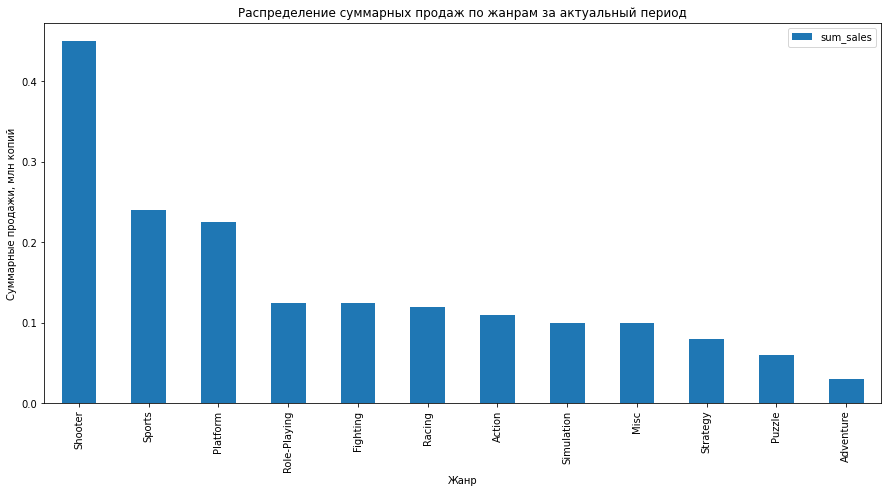

In [43]:
#также построим гистограмму для более наглядного распределения

genre_mean.plot(kind='bar', figsize=(15,7))

plt.legend(loc='upper right')
plt.title('Распределение суммарных продаж по жанрам за актуальный период')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи, млн копий')
plt.show()

<div class="alert alert-info">
<b>Комментарий студента обновленный:</b>
<br>
Можно отметить, что продажи игр по жанрам достаточно неоднородны. Есть лидеры в жанрах, такие как шутеры и спорт, есть и аутсайдеры: стратегии, пазлы и приключения. 
<br>    
Стабильный доход приносят игры жанров "шутер" и "спорт", в частности можно отметить игры серии Call of Duty и FIFA.  
<br>
Действительно, это больше похоже на правду, потому что игры, которые выходят сериями и если они популярны у пользователей, то есть шанс, что и в дальнейшем их будут охотно приобретать пользователи.
</div>

## Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):



### Самые популярные платформы (топ-5). Опишите различия в долях продаж.


In [44]:
#для того, чтобы определить популярные платформы и жанры по регионам напишем функцию

def pop_reg_platform(type_data, region):
    result = games_actual_period.pivot_table(index=type_data, values=region, aggfunc='sum').sort_values(by=region, ascending=False).head()
    result['sum_reg_sales'] =  result[region].sum()
    result['ratio'] = result[region]/result['sum_reg_sales']
    return result.sort_values(by='ratio', ascending=False)

In [45]:
#посмотрим какие платформы популярны в Северной Америке

pop_reg_platform('platform', 'na_sales')

,na_sales,sum_reg_sales,ratio
platform,,,
PS4,108.74,385.22,0.28
XOne,93.12,385.22,0.24
X360,81.66,385.22,0.21
PS3,63.50,385.22,0.16
3DS,38.20,385.22,0.10


In [46]:
#посмотрим какие платформы популярны в Европе

pop_reg_platform('platform', 'eu_sales')

,eu_sales,sum_reg_sales,ratio
platform,,,
PS4,141.09,333.97,0.42
PS3,67.81,333.97,0.20
XOne,51.59,333.97,0.15
X360,42.52,333.97,0.13
3DS,30.96,333.97,0.09


In [47]:
#посмотрим какие платформы популярны в Японии

pop_reg_platform('platform', 'jp_sales')

,jp_sales,sum_reg_sales,ratio
platform,,,
3DS,67.81,136.59,0.50
PS3,23.35,136.59,0.17
PSV,18.59,136.59,0.14
PS4,15.96,136.59,0.12
WiiU,10.88,136.59,0.08


<div class="alert alert-info">
<b>Комментарий студента обновленный:</b>
<br>
Спасибо за замечание. Действительно это более знаковый и правильный показатель. При выполнении проекта потерял нить размышлений, куда-то не туда пошел.
<br>
В лидерах Северной Америки такие платформы как PS4 и XOne. Можно предположить, что последние модели игровых платформ от Sony и Microsoft пришлись по душе пользователям.
<br>   
По европейской части можно сказать, что большее предпочтение отдается играм на PS4 и PS3 от Sony. 
<br>
В Японии со значительным отрывом лидирует портативная приставка от Nintendo.    
</div>

### Самые популярные жанры (топ-5). Поясните разницу.


In [48]:
#посмотрим какие жанры популярны в Северной Америке

pop_reg_platform('genre', 'na_sales')

,na_sales,sum_reg_sales,ratio
genre,,,
Action,126.05,374.95,0.34
Shooter,109.74,374.95,0.29
Sports,65.27,374.95,0.17
Role-Playing,46.40,374.95,0.12
Misc,27.49,374.95,0.07


In [49]:
#посмотрим какие жанры популярны в Европе

pop_reg_platform('genre', 'eu_sales')

,eu_sales,sum_reg_sales,ratio
genre,,,
Action,118.13,323.67,0.36
Shooter,87.86,323.67,0.27
Sports,60.52,323.67,0.19
Role-Playing,36.97,323.67,0.11
Racing,20.19,323.67,0.06


In [50]:
#посмотрим какие жанры популярны в Японии

pop_reg_platform('genre', 'jp_sales')

,jp_sales,sum_reg_sales,ratio
genre,,,
Role-Playing,51.04,114.99,0.44
Action,40.49,114.99,0.35
Misc,9.20,114.99,0.08
Fighting,7.65,114.99,0.07
Shooter,6.61,114.99,0.06


<div class="alert alert-info">
<b>Комментарий студента обновленный:</b>
<br>
Пользователи Северной Америки и Европы отдают  предпочтение таким жанрам как "экшн" и "шутер".
<br>   
Жители Японии предпочитают ролевые игры и экшены. На самом деле это не удивительно, ведь такие игры как Pokemon были разработаны именно в Японии и полюбились пользователям портативных приставок.
</div>

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [51]:
#определим какие значения рейтинга ESRB встречаются в датафрейме

esrb_n = games_actual_period['rating'].unique()

esrb_n

array(['M', nan, 'E', 'T', 'E10+'], dtype=object)

In [52]:
#создадим серию для извлечения индексов в дальнейшем

esrb_name = pd.Series(np.arange(len(esrb_n)), index=esrb_n)

In [53]:
#составим датафрейм по нашим значениям рейтинга

esrb = games_actual_period.query('rating in @esrb_name.index')

esrb

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.10,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16432,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16436,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [54]:
#заменим пропущенные значения рейтинга для дальнейших расчетов

esrb['rating'] = esrb['rating'].fillna(value='no_rat')

In [55]:
#посмотрим какое количество продаж для игр каждого рейтинга

def esrb_sale(type_data, region):
    result = esrb.pivot_table(index=type_data, values=[region], aggfunc='sum').sort_values(by=region, ascending=False).head()
    result['sum_reg_sales'] =  result[region].sum()
    result['ratio'] = result[region]/result['sum_reg_sales']
    return result

In [56]:
#отношение продаж с определенным рейтингом к суммарным продажам в Северной Америке

esrb_sale('rating', 'na_sales')

,na_sales,sum_reg_sales,ratio
rating,,,
M,165.21,437.71,0.38
no_rat,89.42,437.71,0.20
E,79.05,437.71,0.18
E10+,54.24,437.71,0.12
T,49.79,437.71,0.11


In [57]:
##отношение продаж с определенным рейтингом к суммарным продажам в Европе

esrb_sale('rating', 'eu_sales')

,eu_sales,sum_reg_sales,ratio
rating,,,
M,145.32,392.23,0.37
E,83.36,392.23,0.21
no_rat,78.91,392.23,0.20
E10+,42.69,392.23,0.11
T,41.95,392.23,0.11


In [58]:
##отношение продаж с определенным рейтингом к суммарным продажам в Японии

esrb_sale('rating', 'jp_sales')

,jp_sales,sum_reg_sales,ratio
rating,,,
no_rat,85.05,140.78,0.60
T,20.59,140.78,0.15
E,15.14,140.78,0.11
M,14.11,140.78,0.10
E10+,5.89,140.78,0.04


<div class="alert alert-info">
<b>Комментарий студента обновленный:</b>
<br>
По полученным данным можно заметить, что рейтинг ESRB влияет на выбор пользователей игр в Северной Америке и Европе, большинство купленных игр шли в рейтингом "М", а затем либо с рейтингом "Е", либо вовсе без рейтинга.
<br>
В Японии картина отличается: большинство игр были проданы вовсе без рейтинга, т.е. можно сказать, что рейтинг ESRB не влияет на продажи игр в Японии.
</div>

### Вывод

- Типичный пользователь Северной Америки предпочитает такие платформы как PS4 и XOne. Можно предположить, что последние модели игровых платформ от Sony и Microsoft пришлись по душе. Он отдает предпочтение таким жанрам как "экшн" и "шутер". Также данный пользователь учитывает рейтинг ESRB: большинство купленных игр шли в рейтингом "М".
- Типичный европейский пользователь предпочитает играть на  PS4 и PS3 от Sony. Данный пользователь отдает предпочтение таким жанрам игр как "экшн" и "шутер". Также данный пользователь учитывает рейтинг ESRB: большинство купленных игр шли в рейтингом "М", либо с рейтингом "Е".
- Типичный пользовтель В Японии предпочитает играть на портативной приставке 3DS от Nintendo. Любимые жанры пользователя - ролевые игры и экшены. На самом деле это не удивительно, ведь такие игры как Pokemon были разработаны именно в Японии и полюбились пользователям портативных приставок. Пользователь в Японии особо не обращает внимания на значение рейтинга ESRB.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

<b>1 гипотеза:</b>
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


<b>Сформулируем нулевую гипотезу:</b>
<br>
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Далее сформулируем противоположную по смыслу нулевой гипотезе - <b>альтернативную</b>:
<br>
Средние пользовательские рейтинги платформ Xbox One и PC различаются.
<br>
Пороговое значение alpha примем 0.05.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам применим метод 'ttest_ind'. Значение параметра equal_var поставим False, т.к. дисперсии выборок не равны.

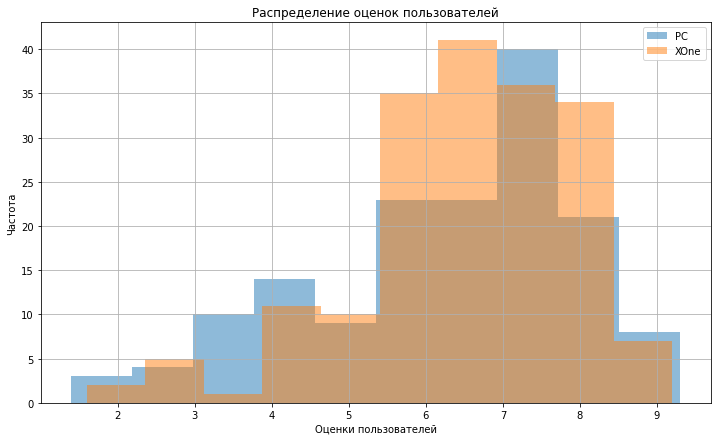

In [59]:
# построим гистограмму распределения оценок пользователей 

pc = games_actual_period.query('platform=="PC"')['user_score']
xone = games_actual_period.query('platform=="XOne"')['user_score']

plt.figure(figsize=(12, 7))

pc.hist(bins=10, alpha=0.5, label='PC')
xone.hist(bins=10, alpha=0.5, label='XOne')

plt.legend(loc='upper right')
plt.title('Распределение оценок пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Частота')
plt.show()

In [60]:
#посчитаем дисперсии выборок

platform_user_score = games_actual_period.query('platform=="XOne" | platform=="PC"').pivot_table(index='platform', values='user_score', aggfunc='var' )

platform_user_score

,user_score
platform,
PC,3.04
XOne,1.91


In [61]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    games_actual_period.query('platform == "XOne"')['user_score'].dropna(), 
    games_actual_period.query('platform == "PC"')['user_score'].dropna(),
    equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-info">
<b>Комментарий студента обновленный:</b>
<br>
Принимаем нулевую гипотезу о сходстве средних пользовательских рейтингов для платформ Xbox One и PC.
</div>

<b>2 гипотеза:</b>
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

<b>Сформулируем нулевую гипотезу:</b>
<br>
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны.

Далее сформулируем противоположную по смыслу нулевой гипотезе - <b>альтернативную</b>:
<br>
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») различаются.
<br>
Пороговое значение alpha примем 0.05.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам применим метод 'ttest_ind'. Значение параметра equal_var поставим False, т.к. дисперсии выборок не равны.

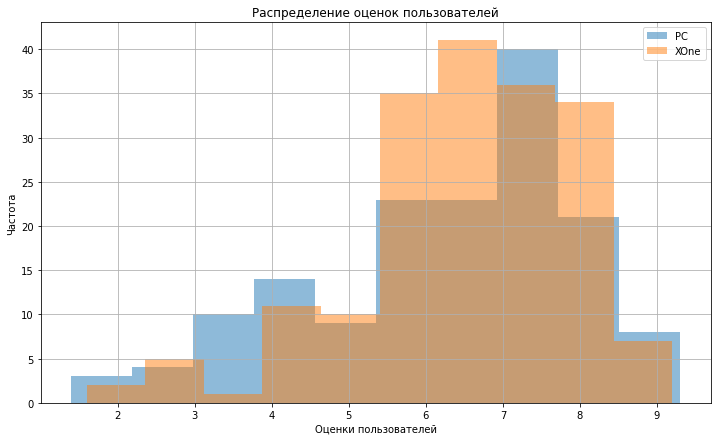

In [62]:
# построим гистограмму распределения оценок пользователей 

action = games_actual_period.query('genre=="Action"')['user_score']
sports = games_actual_period.query('platform=="Sports"')['user_score']

plt.figure(figsize=(12, 7))

pc.hist(bins=10, alpha=0.5, label='PC')
xone.hist(bins=10, alpha=0.5, label='XOne')

plt.legend(loc='upper right')
plt.title('Распределение оценок пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Частота')
plt.show()

In [63]:
#посчитаем дисперсии выборок

genre_user_score = games_actual_period.query('genre=="Action" | genre=="Sports"').pivot_table(index='genre', values='user_score', aggfunc='var' )

genre_user_score

,user_score
genre,
Action,1.77
Sports,3.18


In [64]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    games_actual_period.query('genre=="Action"')['user_score'].dropna(), 
    games_actual_period.query('genre=="Sports"')['user_score'].dropna(),
    equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.4460039700704315e-20
Отвергаем нулевую гипотезу


<div class="alert alert-info">
<b>Комментарий студента обновленный:</b>
<br>
В ходе проверки гипотез мы отвергаем нулевую гипотезу и принимаем альтернативную гипотезу о различии средних пользовательских рейтингов жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»).
</div>

## Общий вывод

Нами был проведен анализ по определению перспективных платформ и игр на 2017 год, получилось выяснить следующее:
- Активное развитие игровой индустрии начинается с 1995 года, достигая пика выпускаемых игр в 2008-2009 годах (1427 и 1426 игр в год соответственно).Также после 2011 года наблюдается резкий спад выпускаемых игр. Данное явление может быть связано с тем, что появляются новые платформы, в том числе мобильные операционные системы, разработчики пишут больше игр для iOS и Android. Как мы видим, данных платформ нет в нашем датасете. Стоит отметить, что продажи по большинству платформ практически сошли на нет к 2016 году. Вторая волна активных продаж началась в 2013 году, когда были созданы такие платформы как PS4 и XOne.
- Среднее время жизни платформы равно 7.6 лет. 
- Среди всех платформ можно выделить ряд платформ, по которым еще есть значительные продажи игр и на которые можно сделать ставку в дальнейшем: PS4, XOne, 3DS, PC. Ни одна из перспективных платформ не показывает роста, однако продажи игр все еще исчисляются милионными тиражами. Вплоть до 2014 года на рынке наблюдалось лидерство приставок PS3 и X360, однако с изобретением PS4 и XOne в 2013 году, картина значительно изменилась, данные платформы заняли большой процент рынка и стали лидерам по продаваемым играм вплоть до 2016 года.
- Есть ряд платформ с играми-бестселлерами, например, такие платформы как PS3, PS4, X360, 3DS. По данным платформам есть игры, которые разошлись тиражом более 10 млн, при том, что, допустим, платформа PS4 относительно молодая.
- Между суммарными продажами игр на PS4 и оценками критиков есть слабая положительная зависимость, а вот между оценками пользователей и суммарными продажами зависимости нет.
- Наибольшая зависимость между оценкой критиков и суммарными продажами наблюдается по платформам XOne и PS4 (0.417 и 0.407 соответсвенно). Также лишь по одной платформе 3DS можно выделить слабовыраженную положительную зависимость между оценками пользователей и суммарными продажами.
- Можно отметить, что продажи игр по жанрам достаточно неоднородны. Есть лидеры в жанрах, такие как экшены и шутеры, есть и аутсайдеры: стратегии и пазлы. Лидерство жанров "экшен" и "шутер" объясняется выпуском таких бестселлеров как Grand Theft Auto V, Call of Duty: Black Ops 3, Call of Duty: Ghosts. Причем сразу на все популярные платформы. То есть пользователям больше интересны подвижные, захватывающие игры с выбором действий.
- В Северной Америке большей популярностью пользуются платформы X360 и пришедшая ей на смену XOne от Microsoft, то есть пользователи больше предпочитают отечественное. Далее идут приставки от Sony PS3 и PS4. Что касается европейской части, то тут картина другая, наоборот, явное лидерство за платформами от японского производителя Sony PS3 и PS4. Совсем интересная картина получилась по Японии. Здесь в топе портативные приставки от Sony и Nintendo.
- В Северной Америке предпочитают играть в шутеры, спортивные симуляторы и игры, отнесенные к жанру "Разное". Достаточно неоднородный выбор у пользователей даннного региона.Что касается европейской части, то пользователи предпочитают играть в гонки, спортивные симуляторы, шутеры и экшены, то есть большее предпочтение отдается активным играм. Жители Японии предпочитают ролевые игры и файтинги. На самом деле это не удивительно, ведь такие игры как Pokemon были разработаны именно в Японии и полюбились пользователям портативных приставок.
- Распределения продаж игр по рейтингам схожи в Европе и Северной Америке. Большинство продаж игр с рейтингом М, то есть для взрослых. В Японии картина отличается: большинство игр продано с рейтингом Т, то есть для подростков. Опять же это объясняется популярностью портативных приставок и выпускаемых под них игр.
- В ходе проверки гипотез мы не смогли отвергнуть нулевую гипотезу и можем говорить о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 
- Также при проверке гипотез можем выяснили, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») различаются.

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Добавил новые выводы ниже)
</div>

- Можно отметить, что продажи игр по жанрам достаточно неоднородны. Есть лидеры в жанрах, такие как шутеры и спорт, есть и аутсайдеры: стратегии, пазлы и приключения. Стабильный доход приносят игры жанров "шутер" и "спорт", в частности можно отметить игры серии Call of Duty и FIFA. Действительно, это больше похоже на правду, потому что игры, которые выходят сериями и если они популярны у пользователей, то есть шанс, что и в дальнейшем их будут охотно приобретать пользователи.
- Типичный пользователь Северной Америки предпочитает такие платформы как PS4 и XOne. Можно предположить, что последние модели игровых платформ от Sony и Microsoft пришлись по душе. Он отдает предпочтение таким жанрам как "экшн" и "шутер". Также данный пользователь учитывает рейтинг ESRB: большинство купленных игр шли в рейтингом "М".
- Типичный европейский пользователь предпочитает играть на PS4 и PS3 от Sony. Данный пользователь отдает предпочтение таким жанрам игр как "экшн" и "шутер". Также данный пользователь учитывает рейтинг ESRB: большинство купленных игр шли в рейтингом "М", либо с рейтингом "Е".
- Типичный пользовтель В Японии предпочитает играть на портативной приставке 3DS от Nintendo. Любимые жанры пользователя - ролевые игры и экшены. На самом деле это не удивительно, ведь такие игры как Pokemon были разработаны именно в Японии и полюбились пользователям портативных приставок. Пользователь в Японии особо не обращает внимания на значение рейтинга ESRB.
- Принимаем нулевую гипотезу о сходстве средних пользовательских рейтингов для платформ Xbox One и PC.
- В ходе проверки гипотез мы отвергаем нулевую гипотезу и принимаем альтернативную гипотезу о различии средних пользовательских рейтингов жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»).